To load: if the files section isn't empty
First rename tess toronto---- ko underscore se seperate karke rename kardo
TESS Toronto wale ko bhi underscore se seperate karke rename karna hai after u run the first cell, jo upload hoga usme underscore nhi hoga because
create a folder called 'ravdess' in the content section

Firstly loading the datasets from kaggle, as these are too huge to be stored on computer

In [ ]:
! rm -rf ALL
! rm -rf AudioWAV
! rm -rf ravdess
! rm -rf audio_speech_actors_01-24
! rm -rf TESS_Toronto_emotional_speech_set_data
! rm -rf tess_toronto_emotional_speech_set_data
# name all folders as it has to be run before each iteration

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vaidehibhat","key":"21ccd7dc13a7f52c2ecc8b29ff2e7dd3"}'}

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!mv kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! pip install -q kaggle

In [ ]:
!kaggle datasets list

ref                                                                  title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
shreyanshverma27/online-sales-dataset-popular-marketplace-data       Online Sales Dataset - Popular Marketplace Data    7KB  2024-05-25 23:55:26           7373        137  1.0              
teocalvo/teomewhy-loyalty-system                                     TeoMeWhy Loyalty System                           22MB  2024-06-14 19:10:56            108        348  1.0              
damirdizdarevic/uefa-euro-2024-players                               UEFA EURO 2024 - Players                          15KB  2024-06-08 18:07:29           1317         27  1.0              
rashadrmammadov/heart-disease-prediction          

Loading Crema-D from kaggle, already only audio files are there in the dataset

In [ ]:
! kaggle datasets download -d ejlok1/cremad

Dataset URL: https://www.kaggle.com/datasets/ejlok1/cremad
License(s): ODC Attribution License (ODC-By)
 99% 449M/451M [00:17<00:00, 32.8MB/s]
100% 451M/451M [00:17<00:00, 27.2MB/s]


Loading TESS dataset

In [ ]:
! kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 99% 424M/428M [00:15<00:00, 29.6MB/s]
100% 428M/428M [00:15<00:00, 29.6MB/s]


Loading SAVEE dataset, has only audio files in it

In [ ]:
! kaggle datasets download -d ejlok1/surrey-audiovisual-expressed-emotion-savee

Dataset URL: https://www.kaggle.com/datasets/ejlok1/surrey-audiovisual-expressed-emotion-savee
License(s): copyright-authors
 98% 105M/107M [00:03<00:00, 32.6MB/s]
100% 107M/107M [00:03<00:00, 29.2MB/s]


Loading RAVDESS dataset, has only audio files in it

In [ ]:
! kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio

Dataset URL: https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio
License(s): CC-BY-NC-SA-4.0
100% 428M/429M [00:12<00:00, 36.4MB/s]
100% 429M/429M [00:13<00:00, 34.6MB/s]


Unzipping the content

In [ ]:
! unzip /content/cremad.zip
! unzip /content/ravdess-emotional-speech-audio.zip
! unzip /content/surrey-audiovisual-expressed-emotion-savee.zip
! unzip /content/toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

Making sense of data, all the datasets have these emotions in common:
1) Anger
2) Disgust
3) Happy
4) Neutral
5) Sad
6) Fear

Tip: remember that RAVDESS labels neutral as calm

Only Crema-D doesn't have surprise hence not including right now, later we can include that too, also when we get access to LSSED database we can start working with that

Work Plan: Create a double numpy array, with indexes as given above (-1 ofc) we will store the file paths in it.

In [ ]:
dataset_array = [[] for _ in range(6)]
#this will contain five arrays on indexes:  0: anger, 1:disgust, 2: Happy, 3: neutral/calm , 4:sad, 5: fear
#further each will contain subarrays containing file paths
#have to create directories of each dataset for it


In [ ]:
! mkdir ravdess

In [ ]:
import pandas as pd
import numpy as np
import os
import sys

In [ ]:
tess_path= '/content/TESS Toronto emotional speech set data'
savee_path='/content/ALL'
cremad_path='/content/AudioWAV'
# have to work exrtra for ravdess


In [ ]:
for i in range(1,25):
  if i<10:
    file_path= f'/content/Actor_0{i}'
    print(file_path)
    !mv {file_path} /content/ravdess


  else:
    file_path= f'/content/Actor_{i}'
    print(file_path)
    !mv {file_path} /content/ravdess





/content/Actor_01
/content/Actor_02
/content/Actor_03
/content/Actor_04
/content/Actor_05
/content/Actor_06
/content/Actor_07
/content/Actor_08
/content/Actor_09
/content/Actor_10
/content/Actor_11
/content/Actor_12
/content/Actor_13
/content/Actor_14
/content/Actor_15
/content/Actor_16
/content/Actor_17
/content/Actor_18
/content/Actor_19
/content/Actor_20
/content/Actor_21
/content/Actor_22
/content/Actor_23
/content/Actor_24


In [ ]:
ravdess_path='/content/ravdess'

In [ ]:
#creating directories
ravdess_dirlist=os.listdir(ravdess_path)
savee_dirlist=os.listdir(savee_path)
cremad_dirlist=os.listdir(cremad_path)
tess_dirlist=os.listdir(tess_path)


Converting and labelling the data for RAVDESS

In [ ]:
for dir in ravdess_dirlist:
  actor=os.listdir(ravdess_path+'/' + dir)
  for file in actor:
    split1=file.split('.')[0]
    split2=split1.split('-')
    if split2[2]=='01': #neutral
      dataset_array[3].append(ravdess_path +'/'+ dir + '/' + file)
    elif split2[2]=='02': #calm
      dataset_array[3].append(ravdess_path +'/'+ dir + '/' + file)
    elif split2[2]=='03' : #happy
      dataset_array[2].append(ravdess_path +'/'+ dir + '/' + file)
    elif split2[2]=='04': #sad
      dataset_array[4].append(ravdess_path +'/'+ dir + '/' + file)
    elif split2[2]=='05' : #angry
      dataset_array[0].append(ravdess_path +'/'+ dir + '/' + file)
    elif split2[2]=='06': #fear
      dataset_array[5].append(ravdess_path +'/'+ dir + '/' + file)
    elif split2[2]=='07': #disgust
      dataset_array[1].append(ravdess_path +'/'+ dir + '/' + file)
    elif split2[2]=='08': #suprise, not considered rn
      continue
    else:
      print("Error")

Converting and Labelling data for TESS

In [ ]:
for dir in tess_dirlist:
  folder=os.listdir(tess_path+'/' + dir)
  split=dir.split('_')[1]
  for file in folder:
    if split== 'neutral' or split=='Neutral': #neutral
      dataset_array[3].append(tess_path +'/'+ dir + '/' + file)

    elif split=='happy' or split=='Happy' : #happy
      dataset_array[2].append(tess_path +'/'+ dir + '/' + file)
    elif split=='sad' or split=='Sad': #sad
      dataset_array[4].append(tess_path +'/'+ dir + '/' + file)
    elif split=='angry' or split=='Angry': #angry
      dataset_array[0].append(tess_path +'/'+ dir + '/' + file)
    elif split=='fear'or split=='Fear': #fear
      dataset_array[5].append(tess_path +'/'+ dir + '/' + file)
    elif split=='disgust' or split=='Disgust': #disgust
      dataset_array[1].append(tess_path +'/'+ dir + '/' + file)
    elif split=='pleasant' or split=='Pleasant': #suprise, not considered rn
      continue
    else:
      print("Error")




Converting and Labelling data for SAVEE

In [ ]:
for file in savee_dirlist:
  splits1=file.split('.')[0]
  splits2=splits1.split('_')[1]
  char_array=list(splits2)
  if char_array[0]== 'n': #neutral
    dataset_array[3].append(savee_path + '/' + file)

  elif char_array[0]=='h' : #happy
    dataset_array[2].append(savee_path + '/' + file)
  elif char_array[0]=='s':
    if char_array[1]=='a':
      dataset_array[4].append(savee_path + '/' + file) #sad

    else:
      continue
  elif char_array[0]=='a': #angry
    dataset_array[0].append(savee_path +  '/' + file)
  elif char_array[0]=='f': #fear
    dataset_array[5].append(savee_path +  '/' + file)
  elif char_array[0]=='d' : #disgust
    dataset_array[1].append(savee_path +  '/' + file)

  else:
    print("Error")

Converting and labelling data for Crema-D

In [ ]:
for file in cremad_dirlist:
  splitsee1=file.split('.')[0]
  splitsee2=splitsee1.split('_')[2]
  if splitsee2== 'NEU': #neutral
    dataset_array[3].append(cremad_path + '/' + file)

  elif splitsee2=='HAP' : #happy
    dataset_array[2].append(cremad_path +  '/' + file)
  elif splitsee2=='SAD' : #sad
    dataset_array[4].append(cremad_path +  '/' + file)
  elif splitsee2=='ANG': #angry
    dataset_array[0].append(cremad_path + '/' + file)
  elif splitsee2=='FEA': #fear
    dataset_array[5].append(cremad_path +  '/' + file)
  elif splitsee2=='DIS': #disgust
    dataset_array[1].append(cremad_path + '/' + file)
  else:
    print("Error")

In [ ]:
print(dataset_array[0])

['/content/ravdess/Actor_08/03-01-05-01-01-01-08.wav', '/content/ravdess/Actor_08/03-01-05-01-02-02-08.wav', '/content/ravdess/Actor_08/03-01-05-02-02-01-08.wav', '/content/ravdess/Actor_08/03-01-05-02-02-02-08.wav', '/content/ravdess/Actor_08/03-01-05-02-01-02-08.wav', '/content/ravdess/Actor_08/03-01-05-01-02-01-08.wav', '/content/ravdess/Actor_08/03-01-05-01-01-02-08.wav', '/content/ravdess/Actor_08/03-01-05-02-01-01-08.wav', '/content/ravdess/Actor_12/03-01-05-01-01-02-12.wav', '/content/ravdess/Actor_12/03-01-05-02-01-02-12.wav', '/content/ravdess/Actor_12/03-01-05-02-02-01-12.wav', '/content/ravdess/Actor_12/03-01-05-02-02-02-12.wav', '/content/ravdess/Actor_12/03-01-05-02-01-01-12.wav', '/content/ravdess/Actor_12/03-01-05-01-01-01-12.wav', '/content/ravdess/Actor_12/03-01-05-01-02-01-12.wav', '/content/ravdess/Actor_12/03-01-05-01-02-02-12.wav', '/content/ravdess/Actor_18/03-01-05-01-02-01-18.wav', '/content/ravdess/Actor_18/03-01-05-02-02-01-18.wav', '/content/ravdess/Actor_18/

In [ ]:
print(dataset_array[1])

['/content/ravdess/Actor_08/03-01-07-02-01-01-08.wav', '/content/ravdess/Actor_08/03-01-07-02-02-02-08.wav', '/content/ravdess/Actor_08/03-01-07-02-02-01-08.wav', '/content/ravdess/Actor_08/03-01-07-01-01-02-08.wav', '/content/ravdess/Actor_08/03-01-07-01-01-01-08.wav', '/content/ravdess/Actor_08/03-01-07-01-02-01-08.wav', '/content/ravdess/Actor_08/03-01-07-02-01-02-08.wav', '/content/ravdess/Actor_08/03-01-07-01-02-02-08.wav', '/content/ravdess/Actor_12/03-01-07-02-02-02-12.wav', '/content/ravdess/Actor_12/03-01-07-02-02-01-12.wav', '/content/ravdess/Actor_12/03-01-07-02-01-02-12.wav', '/content/ravdess/Actor_12/03-01-07-01-01-01-12.wav', '/content/ravdess/Actor_12/03-01-07-01-02-01-12.wav', '/content/ravdess/Actor_12/03-01-07-01-01-02-12.wav', '/content/ravdess/Actor_12/03-01-07-01-02-02-12.wav', '/content/ravdess/Actor_12/03-01-07-02-01-01-12.wav', '/content/ravdess/Actor_18/03-01-07-02-02-01-18.wav', '/content/ravdess/Actor_18/03-01-07-02-01-01-18.wav', '/content/ravdess/Actor_18/

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt


In [ ]:
#dataset_array=np.array(dataset_array)
sr=16000 # standardly used in audio preprocessing, CDs have audio 44050 and using Nyquist frequency it should be more than half
signal_store_array = [[] for _ in range(6)] #we'll load files into this

In [ ]:
print("anger:" , len(dataset_array[0]))
print("disgust:" , len(dataset_array[1]))
print("happy:" , len(dataset_array[2]))
print("neutral:" , len(dataset_array[3]))
print("sad:" , len(dataset_array[4]))
print("fear:" , len(dataset_array[5]))



anger: 1923
disgust: 1923
happy: 1923
neutral: 1895
sad: 1923
fear: 1923


In [ ]:
len(dataset_array)

6

In [ ]:
#array is not homogenous hence I can't convert it into numpy array, neutral has less number of samples
#we won't delete these samples unless and until its absolutely needed
for i in range(0,6):
  if i==3:
    for j in range(0,1895):
      signal_store_array[i].append(librosa.load(dataset_array[i][j] , sr=sr ))
  else:
    for j in range(0,1923):
      signal_store_array[i].append(librosa.load(dataset_array[i][j] , sr=sr ))


In [ ]:
#will be verifying if everything got loaded correctly
print("anger:" , len(signal_store_array[0]))
print("disgust:" , len(signal_store_array[1]))
print("happy:" , len(signal_store_array[2]))
print("neutral:" , len(signal_store_array[3]))
print("sad:" , len(signal_store_array[4]))
print("fear:" , len(signal_store_array[5]))
print(len(signal_store_array))
print(signal_store_array[0][100])

anger: 1923
disgust: 1923
happy: 1923
neutral: 1895
sad: 1923
fear: 1923
6
(array([ 9.7012135e-06,  4.6633352e-07, -4.5659135e-07, ...,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32), 16000)


Cool! now we'll see one or two waveforms and listen to them to ensure sab sahi hai

In [ ]:
#we have to create individual numpy arrays to visualize through waveshow

In [ ]:
s=np.array(signal_store_array[0][100][0])

'librosa.display.waveplot(signal_store_array[3][300] , sr=sr)\nlibrosa.display.waveplot(signal_store_array[4][400] , sr=sr)\nlibrosa.display.waveplot(signal_store_array[5][500] , sr=sr)\n'

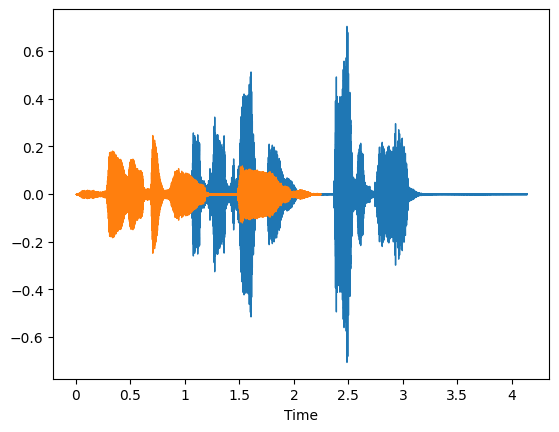

In [ ]:

librosa.display.waveshow(s , sr=sr)
librosa.display.waveshow(signal_store_array[1][200][0] , sr=sr)
'''librosa.display.waveplot(signal_store_array[3][300] , sr=sr)
librosa.display.waveplot(signal_store_array[4][400] , sr=sr)
librosa.display.waveplot(signal_store_array[5][500] , sr=sr)
'''

note that at this point the signal_store_array is a 3d list, and its [i][j][0]th element has an array that consists of all signal points:

The length of each is variable

This shouldn't be a problem once I extract the features, I guess, unless the looping I use requires same time period, whoch shouldn't be the case, I guess only sr will be needed, if that happens I need to do something - maybe look at each dataset and truncate off the rest portions

In [ ]:
max_length = 0
for i in range(len(signal_store_array)):
    for j in range(len(signal_store_array[i])):
        current_length = len(signal_store_array[i][j][0])
        if current_length > max_length:
            max_length = current_length

In [ ]:
import IPython.display as ipd
ipd.Audio(dataset_array[0][400])

In [ ]:
def pad_array(array, max_length):
    return np.pad(array, (0, max_length - len(array)), 'constant')

In [ ]:
padded_arrays_signal = [[] for _ in range(6)]
for i in range(len(signal_store_array)):
    for j in range(len(signal_store_array[i])):
        padded_array = pad_array(signal_store_array[i][j][0], max_length)
        padded_arrays_signal[i].append(padded_array)

In [ ]:
print(len(padded_arrays_signal[0]))

1923


now I have to select which features to load, and save them in a dataframe, input will go as the [i][j][0] which is the array containing datapoints, I hope the variable length doesn't cause an issue

In [ ]:
'''!pip install pyAudioAnalysis'''


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 MB 21.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyAudioAnalysis: filename=pyAudioAnalysis-0.3.14-py3-none-any.whl size=41264373 sha256=1ef4fc8c93e83eab33b7021e9b9ece2f91e9593045ae4befd8c400afb85c0ffc
  Stored in directory: /root/.cache/pip/wheels/a7/54/73/fa830689c2440d2c81ff175c60e374930ad1607a8881e0f43f
Successfully built pyAudioAnalysis


In [ ]:
'''!pip install pyaudio
!pip install eyed3
!pip install simplejson
!pip install pyAudioAnalysis
!pip install pydub'''

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 2.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pyaudio (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pyaudio
Failed to build pyaudio
ERROR: Could not build wheels for pyaudio, which is required to install pyproject.toml-based projects
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.1/246.1 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 3.9 MB/s eta 0:00:00


In [ ]:
'''!apt-get install -y ffmpeg

# Clone pyAudioAnalysis repository
!git clone https://github.com/tyiannak/pyAudioAnalysis.git
%cd pyAudioAnalysis
!python setup.py install
'''

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Cloning into 'pyAudioAnalysis'...
remote: Enumerating objects: 3041, done.
remote: Counting objects: 100% (514/514), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 3041 (delta 429), reused 397 (delta 397), pack-reused 2527
Receiving objects: 100% (3041/3041), 167.65 MiB | 14.30 MiB/s, done.
Resolving deltas: 100% (1817/1817), done.
Updating files: 100% (276/276), done.
/content/pyAudioAnalysis
running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/bui

In [ ]:
'''from pyAudioAnalysis import audioBasicIO #
from pyAudioAnalysis import ShortTermFeatures as sF
'''

In [ ]:
Fs=16000

In [ ]:
'''F, f_names = sF.feature_extraction(
    signal_store_array[0][100][0],  # The audio signal (mono)
    Fs,       # Sampling frequency
    0.050*Fs, # Window size (50 ms window), this is random, no reason
    0.025*Fs  # Step size (25 ms step), random, no reason
    )
print(F)
print(f_names)
print(F.shape)
print(len(f_names))
for i in range(68):
  print(len(F[i]))'''
#9 se 9+13=22 matlb index 8 se 21 jaaega, 8 se 22
#F[i] is the kaam ka array, 8 se 22, f_names ke bhi 8 se 22 ke index columns rhenge


[[ 1.66458073e-01  1.52690864e-01  1.53942428e-01 ...  2.69086358e-01
   2.81602003e-01  1.88986233e-01]
 [ 5.68323876e-11  1.02070302e-10  9.72942362e-11 ...  1.15529538e-10
   3.03429878e-10  2.68409246e-10]
 [ 2.03082260e+00  1.58712875e+00  1.37001299e+00 ...  2.93397075e+00
   2.29275179e+00  1.90207638e+00]
 ...
 [ 0.00000000e+00  7.77019300e-03  1.93108267e-03 ... -2.22667517e-02
   1.59486933e-02  1.06170115e-02]
 [ 0.00000000e+00 -3.66587096e-03 -3.55440420e-04 ...  8.65512996e-04
  -1.71282417e-03  3.84718707e-03]
 [ 0.00000000e+00  1.37388624e-02 -2.16974417e-03 ... -7.00299066e-03
   2.45505678e-02 -5.45916284e-03]]
['zcr', 'energy', 'energy_entropy', 'spectral_centroid', 'spectral_spread', 'spectral_entropy', 'spectral_flux', 'spectral_rolloff', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12', 'mfcc_13', 'chroma_1', 'chroma_2', 'chroma_3', 'chroma_4', 'chroma_5', 'chroma_6', 'chroma_7', 'chroma_8', '

In [ ]:
df_feats=pd.DataFrame()

In [ ]:
'''features_array = [[[] for _ in range(1923)] for _ in range(6)]

for i in range(6):
  for j in range(len(padded_arrays_signal[i])):
    F, f_names = sF.feature_extraction(
    padded_arrays_signal[i][j],  # The audio signal (mono)
    Fs,
    0.050*Fs, # Window size (50 ms window), this is random, no reason
    0.025*Fs  # Step size (25 ms step), random, no reason
    )
    for k in range(8,22):
      features_array[i][j].append(F[k])
print(len(features_array))
print(len(features_array[0]))
print(len(features_array[0][1]))'''




KeyboardInterrupt: 

In [ ]:
'''n_mfcc = 13
mfccs = librosa.feature.mfcc(y=padded_arrays_signal[0][1], sr=sr, n_mfcc=n_mfcc)

mfccs = mfccs.T'''

In [ ]:
'''print(mfccs)'''

[[-751.2031        2.130325      2.1284087  ...    2.0676696
     2.054534      2.0402093 ]
 [-750.7655        2.7489092     2.7459064  ...    2.651062
     2.6306415     2.608411  ]
 [-752.0433        0.94259506    0.9417975  ...    0.9164591
     0.9109766     0.9050006 ]
 ...
 [-752.70996       0.            0.         ...    0.
     0.            0.        ]
 [-752.70996       0.            0.         ...    0.
     0.            0.        ]
 [-752.70996       0.            0.         ...    0.
     0.            0.        ]]


In [ ]:
print(len(mfccs[0]))

13


In [ ]:
'''mfccs = pd.DataFrame(mfccs)'''


In [ ]:
'''df_new=pd.concat([df_feats, mfccs], ignore_index=True)'''

In [ ]:
'''print(df_new)'''

             0          1          2          3          4          5   \
0   -734.443298  14.247645  13.856277  13.228588  12.399449  11.413802   
1   -737.857117   9.525621   9.444624   9.311200   9.127670   8.897190   
2   -740.284058   6.110037   6.078889   6.027472   5.956530   5.867070   
3   -738.930542   8.004944   7.916175   7.770107   7.569514   7.318197   
4   -738.304932   8.897408   8.831547   8.722824   8.572781   8.383548   
..          ...        ...        ...        ...        ...        ...   
219 -744.611938   0.000000   0.000000   0.000000   0.000000   0.000000   
220 -744.611938   0.000000   0.000000   0.000000   0.000000   0.000000   
221 -744.611938   0.000000   0.000000   0.000000   0.000000   0.000000   
222 -744.611938   0.000000   0.000000   0.000000   0.000000   0.000000   
223 -744.611938   0.000000   0.000000   0.000000   0.000000   0.000000   

            6         7         8         9         10        11        12  
0    10.323236  9.182108  8.043598

In [ ]:
'''mfccs = librosa.feature.mfcc(y=padded_arrays_signal[1][1], sr=sr, n_mfcc=n_mfcc)

# Transpose the MFCCs to have time frames as rows and MFCC coefficients as columns
mfccs = mfccs.T
mfccs = pd.DataFrame(mfccs)
df_new=pd.concat([df_new, mfccs], ignore_index=True)
print(df_new)'''

             0          1          2          3          4          5   \
0   -734.443298  14.247645  13.856277  13.228588  12.399449  11.413802   
1   -737.857117   9.525621   9.444624   9.311200   9.127670   8.897190   
2   -740.284058   6.110037   6.078889   6.027472   5.956530   5.867070   
3   -738.930542   8.004944   7.916175   7.770107   7.569514   7.318197   
4   -738.304932   8.897408   8.831547   8.722824   8.572781   8.383548   
..          ...        ...        ...        ...        ...        ...   
443 -776.715271   0.000000   0.000000   0.000000   0.000000   0.000000   
444 -776.715271   0.000000   0.000000   0.000000   0.000000   0.000000   
445 -776.715271   0.000000   0.000000   0.000000   0.000000   0.000000   
446 -776.715271   0.000000   0.000000   0.000000   0.000000   0.000000   
447 -776.715271   0.000000   0.000000   0.000000   0.000000   0.000000   

            6         7         8         9         10        11        12  
0    10.323236  9.182108  8.043598

# Main Feature extracting function

In [ ]:
def extract_feats(audio_array):
  frame_length = len(audio_array)
  sr=16000
  frame_length = 2048
  hop_length = 512
  #mfccs:
  n_mfcc = 40
  mfccs = librosa.feature.mfcc(y=audio_array, sr=sr, n_mfcc=n_mfcc, n_fft=frame_length, hop_length=hop_length)
  mfccs=mfccs.T
  mfccs_arr=[]
  for i in range(n_mfcc):
    temp_arr=[]
    for j in range (len(mfccs)):
      temp_arr.append(mfccs[j][i])
    temp_arr=np.array(temp_arr)
    mfccs_arr.append(np.mean(temp_arr))
  mfccs_arr=np.array(mfccs_arr)
  #chroma stft:
  chroma_stft = librosa.feature.chroma_stft(y=audio_array, sr=sr, n_fft=frame_length, hop_length=hop_length)
  chroma_stft=chroma_stft.T
  chroma_arr=[]
  for i in range(12):
    temp_arr=[]
    for j in range (len(chroma_stft)):
      temp_arr.append(chroma_stft[j][i])
    temp_arr=np.array(temp_arr)
    chroma_arr.append(np.mean(temp_arr))
  chroma_arr=np.array(chroma_arr)
  #mel spectrogram:
  n_mels = 128
  mel_spectrogram = librosa.feature.melspectrogram(y=audio_array, sr=sr, n_mels=n_mels)
  mel_spectrogram=mel_spectrogram.T
  mel_arr=[]
  for i in range(n_mels):
    temp_arr=[]
    for j in range (len(mel_spectrogram)):
      temp_arr.append(mel_spectrogram[j][i])
    temp_arr=np.array(temp_arr)
    mel_arr.append(np.mean(temp_arr))
  mel_arr=np.array(mel_arr)
  #zcr:
  zero_crossings = np.sum(np.abs(np.diff(np.sign(audio_array)))) / 2

  zcr = zero_crossings / len(audio_array)
  zcr=np.array(zcr)
  #rms:
  rms = np.sqrt(np.mean(np.square(audio_array)))
  rms=np.array(rms)

  row=np.hstack((mfccs_arr, chroma_arr, mel_arr, zcr, rms))

  return row





In [ ]:
row=extract_feats(padded_arrays_signal[0][1])
print (len(row))

27


In [ ]:
row=pd.DataFrame(row)
row=row.T
print (row)

           0          1         2        3         4         5         6   \
0 -658.205078  21.702257 -3.087338  4.50118 -1.915585 -1.169164 -2.938886   

         7        8         9   ...        17        18        19        20  \
0 -4.224504 -2.60257  0.021381  ...  0.300482  0.316948  0.287513  0.293028   

         21       22        23        24        25        26  
0  0.272327  0.25593  0.306673  0.300313  0.147562  0.008534  

[1 rows x 27 columns]


Creating a dataframe of features

In [ ]:
for i in range(6):
  for j in range(len(padded_arrays_signal[i])):
    row=extract_feats(padded_arrays_signal[i][j])
    label=np.array(i)
    row=np.hstack((row,label))
    row=pd.DataFrame(row)
    row=row.T
    df_feats=pd.concat([df_feats, row], ignore_index=True)

/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


In [ ]:
print(df_feats)

              0          1          2          3         4         5    \
0     -436.915741  19.300283 -10.296595   7.153496 -4.689345 -5.749636   
1     -522.693481  23.733992  -9.443792  11.183108 -3.598849 -4.429813   
2     -449.587402  18.035475 -13.060452   8.396014 -5.319566 -7.766049   
3     -509.851013  23.486782  -9.914490  11.550021 -4.587460 -5.390690   
4     -407.649384  21.512039 -12.989004   9.402008 -4.722947 -8.453839   
...           ...        ...        ...        ...       ...       ...   
11505 -599.396667  40.495754  18.198666  10.117813  3.527800  2.765840   
11506 -573.097595  33.610851   8.517225   8.283561  3.925596 -0.470983   
11507 -578.192444  35.018547  17.491789   5.009651  4.478399  1.391589   
11508 -723.259216  40.448277  18.959570   7.697129  5.869102  4.552409   
11509 -650.406677  26.432148  10.880136  11.605944  1.260108  0.417786   

            6          7         8         9    ...       173       174  \
0     -3.301994 -10.884763 -3.547664

In [ ]:

df_feats = df_feats.sample(frac=1).reset_index(drop=True)


In [ ]:
df_feats.to_csv('df_feats.csv')

In [ ]:
df_feats=df_feats.iloc[:2000000, :]

# SVM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

df_feats=pd.read_csv('/content/df_feats (1).csv')
X = df_feats.iloc[:, 52:181]
#X_hash=df_feats.iloc[:, 25:-1]
#X=pd.concat([X, X_hash] , axis=1)
y = df_feats.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#pca = PCA(n_components=25)

#X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)
classifier = SVC(kernel='rbf', random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the kernel SVM classifier: {accuracy:.2f}")


Accuracy of the kernel SVM classifier: 0.41


In [ ]:
# aagey kya krna hai, feature extractor function for one data signal, define krenge, isme 13 coefficients mfcc ke, rms, zcr, chroma stft and mel spectrogram extract krenge, sabme frame length hoga signal ke barabar. fir ye dataframe ak ek row banega, sabko dataframe me daal denge alon with label

# vanilla cnn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Conv1D, MaxPooling1D, Dropout
from tensorflow.keras.utils import to_categorical


df_feats=pd.read_csv('/content/df_feats (1).csv')
print(df_feats.shape)
X = df_feats.iloc[:, 52:181].values
#X_hash=df_feats.iloc[:, 25:-1]
#print(X.shape)
#X=pd.concat([X, X_hash] , axis=1)
y = df_feats.iloc[:, -1]
#X=X.iloc[:,:].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X = X.reshape(X.shape[0], X.shape[1], 1)
print (X.shape)
print (X_train.shape)
print (X_test.shape)
# Build CNN model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 1), activation='relu', input_shape=(X.shape[1], 1, 1)))
#model.add(MaxPooling2D((2, 1)))

model.add(Conv2D(64, (3, 1), activation='relu'))
#model.add(MaxPooling2D((2, 1)))

model.add(Conv2D(64, (3, 1), activation='relu'))

model.add(Conv2D(128, (3, 1), activation='relu'))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 1), activation='relu'))
model.add(Dropout(0.3))
model.add(Conv2D(256, (3, 1), activation='relu'))

model.add(Dropout(0.4))
#model.add(Conv2D(256, (3, 1), activation='relu'))
#model.add(Dropout(0.4))

model.add(Flatten())


model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(6, activation='softmax'))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))


loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')




(11510, 184)
(11510, 129, 1)
(9208, 129, 1)
(2302, 129, 1)
Epoch 1/25
288/288 [==============================] - 50s 168ms/step - loss: 1.5905 - accuracy: 0.3234 - val_loss: 1.4267 - val_accuracy: 0.4288
Epoch 2/25
288/288 [==============================] - 49s 171ms/step - loss: 1.4337 - accuracy: 0.4195 - val_loss: 1.3557 - val_accuracy: 0.4752
Epoch 3/25
288/288 [==============================] - 50s 174ms/step - loss: 1.3663 - accuracy: 0.4448 - val_loss: 1.3024 - val_accuracy: 0.4870
Epoch 4/25
288/288 [==============================] - 48s 166ms/step - loss: 1.3189 - accuracy: 0.4680 - val_loss: 1.2439 - val_accuracy: 0.5178
Epoch 5/25
288/288 [==============================] - 51s 176ms/step - loss: 1.2831 - accuracy: 0.4799 - val_loss: 1.3725 - val_accuracy: 0.4687
Epoch 6/25
288/288 [==============================] - 48s 168ms/step - loss: 1.2632 - accuracy: 0.4883 - val_loss: 1.2938 - val_accuracy: 0.4996
Epoch 7/25
288/288 [==============================] - 47s 164ms/step - 

#ResNet

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, Add, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization

df_feats = pd.read_csv('/content/df_feats.csv')

X = df_feats.iloc[:, 1:-1].values
y = df_feats.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Define a residual block
def residual_block(x, filters, kernel_size=3):
    shortcut = x
    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)


    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

# Build ResNet model
input_shape = (X.shape[1], X.shape[2], 1)
inputs = Input(shape=input_shape)

x = Conv2D(32, (3, 1), activation='relu')(inputs)
x = MaxPooling2D((2, 1))(x)

x = residual_block(x, 32)
x = residual_block(x, 32)

x = Conv2D(64, (3, 1), activation='relu')(x)
x = MaxPooling2D((2, 1))(x)

x = residual_block(x, 64)
x = residual_block(x, 64)

x = Flatten()(x)

x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(6, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')


Epoch 1/25
288/288 [==============================] - 10s 11ms/step - loss: 1.6587 - accuracy: 0.3029 - val_loss: 1.6458 - val_accuracy: 0.3341
Epoch 2/25
288/288 [==============================] - 3s 9ms/step - loss: 1.4011 - accuracy: 0.4106 - val_loss: 1.2689 - val_accuracy: 0.4878
Epoch 3/25
288/288 [==============================] - 3s 9ms/step - loss: 1.3292 - accuracy: 0.4464 - val_loss: 1.2480 - val_accuracy: 0.5026
Epoch 4/25
288/288 [==============================] - 3s 11ms/step - loss: 1.2775 - accuracy: 0.4686 - val_loss: 1.1835 - val_accuracy: 0.5200
Epoch 5/25
288/288 [==============================] - 3s 10ms/step - loss: 1.2367 - accuracy: 0.5007 - val_loss: 1.1716 - val_accuracy: 0.5187
Epoch 6/25
288/288 [==============================] - 3s 9ms/step - loss: 1.2076 - accuracy: 0.5001 - val_loss: 1.1967 - val_accuracy: 0.5308
Epoch 7/25
288/288 [==============================] - 3s 9ms/step - loss: 1.2118 - accuracy: 0.5102 - val_loss: 1.1549 - val_accuracy: 0.5256
Ep

Depper ResNet

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, Add, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam

df_feats = pd.read_csv('/content/df_feats.csv')

X = df_feats.iloc[:, 1:-1].values
y = df_feats.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Define a residual block
def residual_block(x, filters, kernel_size=3, dropout_rate=0.25):
    shortcut = x
    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(dropout_rate)(x)
    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

# Build ResNet model
input_shape = (X.shape[1], X.shape[2], 1)
inputs = Input(shape=input_shape)

x = Conv2D(32, (3, 1), activation='relu')(inputs)
x = MaxPooling2D((2, 1))(x)
x = Dropout(0.25)(x)

# Residual blocks
x = residual_block(x, 32)
x = residual_block(x, 32)
x = residual_block(x, 32)

x = Conv2D(64, (3, 1), activation='relu')(x)
x = MaxPooling2D((2, 1))(x)
x = Dropout(0.25)(x)

# More residual blocks
x = residual_block(x, 64)
x = residual_block(x, 64)
x = residual_block(x, 64)

x = Flatten()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(6, activation='softmax')(x)


model = Model(inputs=inputs, outputs=outputs)


model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')


Epoch 1/25
288/288 [==============================] - 13s 17ms/step - loss: 1.9027 - accuracy: 0.1704 - val_loss: 1.7907 - val_accuracy: 0.1685
Epoch 2/25
288/288 [==============================] - 5s 16ms/step - loss: 1.7447 - accuracy: 0.2308 - val_loss: 1.5819 - val_accuracy: 0.3692
Epoch 3/25
288/288 [==============================] - 4s 13ms/step - loss: 1.6183 - accuracy: 0.3092 - val_loss: 1.3767 - val_accuracy: 0.4118
Epoch 4/25
288/288 [==============================] - 4s 13ms/step - loss: 1.5286 - accuracy: 0.3383 - val_loss: 1.3573 - val_accuracy: 0.4492
Epoch 5/25
288/288 [==============================] - 5s 16ms/step - loss: 1.4843 - accuracy: 0.3770 - val_loss: 1.3109 - val_accuracy: 0.4696
Epoch 6/25
288/288 [==============================] - 4s 13ms/step - loss: 1.4476 - accuracy: 0.3894 - val_loss: 1.2794 - val_accuracy: 0.4831
Epoch 7/25
288/288 [==============================] - 4s 13ms/step - loss: 1.4134 - accuracy: 0.4082 - val_loss: 1.2763 - val_accuracy: 0.483

# XgBoost

In [ ]:
import xgboost as xgb

default_params = xgb.XGBClassifier().get_params()
print(default_params)


{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA



df_feats=pd.read_csv('/content/df_feats.csv')
X = df_feats.iloc[:, 1:-1]
#X_hash=df_feats.iloc[:, 25:-1]
#X=pd.concat([X, X_hash] , axis=1)
y = df_feats.iloc[:, -1]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy_score(y_test, y_pred)

0.6463944396177237

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


df_feats = pd.read_csv('/content/df_feats (1).csv')
X = df_feats.iloc[:, 1:41].values
y = df_feats.iloc[:, -1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


param_dist = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'gamma': [0, 0.1, 0.3],
    'n_estimators': [100, 200, 300]
}


xgb_model = XGBClassifier(tree_method='gpu_hist', use_label_encoder=False)


random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=10, scoring='accuracy', cv=3, verbose=1, random_state=0, n_jobs=-1)
random_search.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='mlogloss', early_stopping_rounds=10)


print("Best parameters found: ", random_search.best_params_)


best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.4f}')


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:37:50] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[0]	validation_0-mlogloss:1.73077
[1]	validation_0-mlogloss:1.67407
[2]	validation_0-mlogloss:1.62996
[3]	validation_0-mlogloss:1.58596
[4]	validation_0-mlogloss:1.54820
[5]	validation_0-mlogloss:1.51558
[6]	validation_0-mlogloss:1.48693
[7]	validation_0-mlogloss:1.46348
[8]	validation_0-mlogloss:1.43948
[9]	validation_0-mlogloss:1.41805
[10]	validation_0-mlogloss:1.39810
[11]	validation_0-mlogloss:1.37949
[12]	validation_0-mlogloss:1.36152
[13]	validation_0-mlogloss:1.34675
[14]	validation_0-mlogloss:1.33211
[15]	validation_0-mlogloss:1.31930
[16]	validation_0-mlogloss:1.30753
[17]	validation_0-mlogloss:1.29539
[18]	validation_0-mlogloss:1.28403
[19]	validation_0-mlogloss:1.27402
[20]	validation_0-mlogloss:1.26517
[21]	validation_0-mlogloss:1.25648
[22]	validation_0-mlogloss:1.24884
[23]	validation_0-mlogloss:1.24052
[24]	validation_0-mlogloss:1.23313
[25]	validation_0-mlogloss:1.22596
[26]	validation_0-mlogloss:1.21936
[27]	validation_0-mlogloss:1.21317
[28]	validation_0-mlogloss:1.2

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:37:54] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Test accuracy: 0.5999


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:37:56] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:37:56] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


#DenseNet

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, Concatenate, BatchNormalization, Activation, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam


df_feats = pd.read_csv('/content/df_feats.csv')

X = df_feats.iloc[:, 1:41].values
y = df_feats.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Dense block
def dense_block(x, num_layers, growth_rate, dropout_rate=0.2):
    for i in range(num_layers):
        y = BatchNormalization()(x)
        y = Activation('relu')(y)
        y = Conv2D(growth_rate, (3, 1), padding='same')(y)
        y = Dropout(dropout_rate)(y)
        x = Concatenate()([x, y])
    return x

# Transition layer
def transition_layer(x, compression_factor=0.5):
    num_filters = int(x.shape[-1] * compression_factor)
    x = BatchNormalization()(x)
    x = Conv2D(num_filters, (1, 1), padding='same')(x)
    x = MaxPooling2D((2, 1))(x)
    return x

# DenseNet model
input_shape = (X.shape[1], X.shape[2], 1)
inputs = Input(shape=input_shape)

x = Conv2D(32, (3, 1), padding='same', activation='relu')(inputs)
x = MaxPooling2D((2, 1))(x)

x = dense_block(x, num_layers=4, growth_rate=16)
x = transition_layer(x)

x = dense_block(x, num_layers=4, growth_rate=32)
x = transition_layer(x)

x = dense_block(x, num_layers=4, growth_rate=64)

x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(6, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')


Epoch 1/25
288/288 [==============================] - 18s 21ms/step - loss: 1.7248 - accuracy: 0.2641 - val_loss: 1.4737 - val_accuracy: 0.3866
Epoch 2/25
288/288 [==============================] - 7s 25ms/step - loss: 1.4596 - accuracy: 0.3961 - val_loss: 1.2646 - val_accuracy: 0.4787
Epoch 3/25
288/288 [==============================] - 5s 16ms/step - loss: 1.3283 - accuracy: 0.4585 - val_loss: 1.2167 - val_accuracy: 0.5030
Epoch 4/25
288/288 [==============================] - 5s 16ms/step - loss: 1.2810 - accuracy: 0.4735 - val_loss: 1.1739 - val_accuracy: 0.5091
Epoch 5/25
288/288 [==============================] - 7s 26ms/step - loss: 1.2470 - accuracy: 0.4946 - val_loss: 1.2286 - val_accuracy: 0.5052
Epoch 6/25
288/288 [==============================] - 5s 16ms/step - loss: 1.2262 - accuracy: 0.5047 - val_loss: 1.2771 - val_accuracy: 0.4952
Epoch 7/25
288/288 [==============================] - 5s 16ms/step - loss: 1.2131 - accuracy: 0.5140 - val_loss: 1.1426 - val_accuracy: 0.521

# LSTM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Attention, Input, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model


df_feats = pd.read_csv('/content/df_feats (1).csv')

X = df_feats.iloc[:, 1:41].values
y = df_feats.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X = X.reshape(X.shape[0], X.shape[1], 1)

'''
model = Sequential()


model.add(LSTM(32, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))

model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.25))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.25))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.25))

model.add(LSTM(256))
model.add(Dropout(0.25))


model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))



model.add(Dense(6, activation='softmax'))



model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])'''
input_layer = Input(shape=(X.shape[1], X.shape[2]))
lstm_layer1 = LSTM(32, return_sequences=True)(input_layer)
lstm_layer2 = LSTM(64, return_sequences=True)(lstm_layer1)
dropout_layer2 = Dropout(0.25)(lstm_layer2)
lstm_layer3 = LSTM(64, return_sequences=True)(dropout_layer2)
dropout_layer3 = Dropout(0.25)(lstm_layer3)
lstm_layer4 = LSTM(128, return_sequences=True)(dropout_layer3)
dropout_layer4 = Dropout(0.25)(lstm_layer4)
lstm_layer5 = LSTM(256, return_sequences=True)(dropout_layer4)
dropout_layer5 = Dropout(0.25)(lstm_layer5)

# Attention layer
attention = Attention()([lstm_layer5, lstm_layer5])
attention = Concatenate(axis=-1)([attention, lstm_layer5])

# Flatten the output from attention to feed into Dense layers
flatten_layer = Dense(256, activation='relu')(attention)
dropout_flatten = Dropout(0.25)(flatten_layer)

# Dense layers after attention
dense_layer = Dense(64, activation='relu')(dropout_flatten)
dropout_dense = Dropout(0.25)(dense_layer)

# Output layer
output_layer = Dense(6, activation='softmax')(dropout_dense)

# Define the model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))


loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')


Epoch 1/25


InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-5-84eec30c31e0>", line 85, in <cell line: 85>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2454, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5775, in sparse_categorical_crossentropy

logits and labels must have the same first dimension, got logits shape [1280,6] and labels shape [32]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_22471]

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Attention, Input, Flatten, Concatenate
from tensorflow.keras.optimizers import Adam

# Load your dataset
df_feats = pd.read_csv('/content/df_feats (1).csv')

# Prepare your features and target
X = df_feats.iloc[:, 1:41].values
y = df_feats.iloc[:, -1].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for LSTM input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Build the model using the Functional API
input_layer = Input(shape=(X.shape[1], X.shape[2]))
lstm_layer1 = LSTM(32, return_sequences=True)(input_layer)
lstm_layer2 = LSTM(64, return_sequences=True)(lstm_layer1)
dropout_layer2 = Dropout(0.25)(lstm_layer2)
lstm_layer3 = LSTM(64, return_sequences=True)(dropout_layer2)
dropout_layer3 = Dropout(0.25)(lstm_layer3)
lstm_layer4 = LSTM(128, return_sequences=True)(dropout_layer3)
dropout_layer4 = Dropout(0.25)(lstm_layer4)
lstm_layer5 = LSTM(256, return_sequences=True)(dropout_layer4)
dropout_layer5 = Dropout(0.25)(lstm_layer5)

# Attention layer
attention = Attention()([lstm_layer5, lstm_layer5])

# Flatten the attention output
flatten_attention = Flatten()(attention)

# Dense layers after attention
dense_layer1 = Dense(64, activation='relu')(flatten_attention)
dropout_dense1 = Dropout(0.25)(dense_layer1)

# Output layer
output_layer = Dense(6, activation='softmax')(dropout_dense1)

# Define the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')


Epoch 1/25
288/288 [==============================] - 107s 333ms/step - loss: 1.7040 - accuracy: 0.2632 - val_loss: 1.5184 - val_accuracy: 0.3623
Epoch 2/25
288/288 [==============================] - 100s 347ms/step - loss: 1.5178 - accuracy: 0.3746 - val_loss: 1.4017 - val_accuracy: 0.4292
Epoch 3/25
288/288 [==============================] - 99s 345ms/step - loss: 1.4103 - accuracy: 0.4288 - val_loss: 1.3691 - val_accuracy: 0.4414
Epoch 4/25
288/288 [==============================] - 99s 345ms/step - loss: 1.3328 - accuracy: 0.4662 - val_loss: 1.2931 - val_accuracy: 0.4791
Epoch 5/25
288/288 [==============================] - 98s 341ms/step - loss: 1.3005 - accuracy: 0.4731 - val_loss: 1.2745 - val_accuracy: 0.4800
Epoch 6/25
288/288 [==============================] - 97s 337ms/step - loss: 1.2686 - accuracy: 0.4940 - val_loss: 1.2153 - val_accuracy: 0.5152
Epoch 7/25
288/288 [==============================] - 97s 338ms/step - loss: 1.2404 - accuracy: 0.5009 - val_loss: 1.2231 - val_

# This cnn-lstm taken from a place where they did audio classification based on emotion

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam


df_feats = pd.read_csv('/content/df_feats.csv')


X = df_feats.iloc[:, 1:41].values
y = df_feats.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape
#x_testcnn[0]

((9208, 40, 1), (9208,), (2302, 40, 1), (2302,))

In [ ]:
import tensorflow.keras.layers as L

model = Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),

    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),
    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    Dropout(0.2),
    L.Conv1D(16,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    Dropout(0.2),

    L.Flatten(),
    L.Dense(16,activation='relu'),
    L.BatchNormalization(),
    L.Dense(16,activation='relu'),
    L.BatchNormalization(),
    L.Dense(6,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 40, 512)           3072      
                                                                 
 batch_normalization_36 (Ba  (None, 40, 512)           2048      
 tchNormalization)                                               
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 20, 512)           0         
 g1D)                                                            
                                                                 
 conv1d_7 (Conv1D)           (None, 20, 512)           1311232   
                                                                 
 batch_normalization_37 (Ba  (None, 20, 512)           2048      
 tchNormalization)                                               
                                                      

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
model_checkpoint = ModelCheckpoint('best_model1_weights.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
early_stop=EarlyStopping(monitor='val_accuracy',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [ ]:
history=model.fit(x_traincnn, y_train, epochs=50, validation_data=(x_testcnn, y_test), batch_size=32,callbacks=[early_stop,lr_reduction,model_checkpoint])


Epoch 1/50
288/288 [==============================] - ETA: 0s - loss: 1.7408 - accuracy: 0.2869

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


288/288 [==============================] - 18s 25ms/step - loss: 1.7408 - accuracy: 0.2869 - val_loss: 1.8067 - val_accuracy: 0.2020 - lr: 0.0010
Epoch 2/50
288/288 [==============================] - 5s 16ms/step - loss: 1.4997 - accuracy: 0.3892 - val_loss: 1.4416 - val_accuracy: 0.4205 - lr: 0.0010
Epoch 3/50
288/288 [==============================] - 7s 24ms/step - loss: 1.4080 - accuracy: 0.4394 - val_loss: 1.2988 - val_accuracy: 0.4822 - lr: 0.0010
Epoch 4/50
288/288 [==============================] - 7s 25ms/step - loss: 1.3377 - accuracy: 0.4727 - val_loss: 1.3120 - val_accuracy: 0.4800 - lr: 0.0010
Epoch 5/50
288/288 [==============================] - 4s 15ms/step - loss: 1.3083 - accuracy: 0.4810 - val_loss: 1.3784 - val_accuracy: 0.4344 - lr: 0.0010
Epoch 6/50
288/288 [==============================] - 5s 16ms/step - loss: 1.2661 - accuracy: 0.5036 - val_loss: 1.2201 - val_accuracy: 0.5078 - lr: 0.0010
Epoch 7/50
288/288 [==============================] - 7s 23ms/step - loss: